<a href="https://colab.research.google.com/github/Subin-pds/Machine-Learning-Practice-Projects/blob/main/Startup_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have data set comprising of the spendings of different start-ups and their corresponding profit yeild.

The dataset comprises of the information on spending of money to different utilities within the startups and the corresponding profit yeild as the outcome of spending. The intension of this analysis is to find whether we could produce a linear model to predict the future profit based on allocations made within different domains of business. It is very important to find the weitage of different parameters to get an idea of how to effectively spend the budget to yeild the best profit. We have to process the data and get it ready to be trained, then create a model out of it. Finally we evaluate the efficiency of the model


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:

#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Copy of 50_Startups.csv')

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Plotting different parameters against the profit to get the relationship

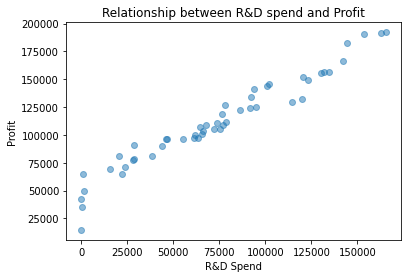

In [6]:
#plotting R&D Spend vs Profit

plt.scatter(df['R&D Spend'],df['Profit'], alpha=0.5)
plt.title('Relationship between R&D spend and Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

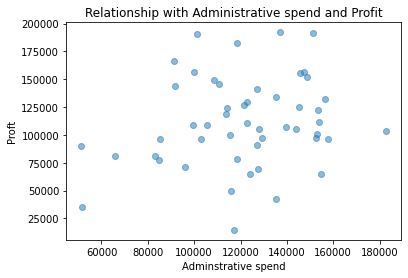

In [7]:
#plotting Administration Spend vs Profit

plt.scatter(df['Administration'], df['Profit'],alpha=0.5)
plt.title('Relationship with Administrative spend and Profit')
plt.xlabel('Adminstrative spend')
plt.ylabel('Proft')
plt.show()

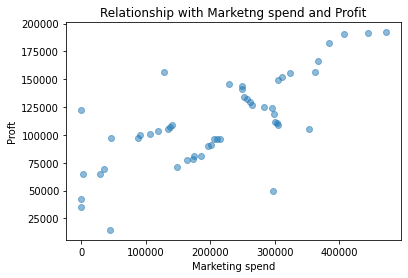

In [11]:
#plotting Marketing Spend vs Profit

plt.scatter(df['Marketing Spend'], df['Profit'],alpha=0.5)
plt.title('Relationship with Marketng spend and Profit')
plt.xlabel('Marketing spend')
plt.ylabel('Proft')
plt.show()

We have categorical variable 'State' Thus we need to create dummy variable for before performing linear regression.


Text(0, 0.5, 'Profit')

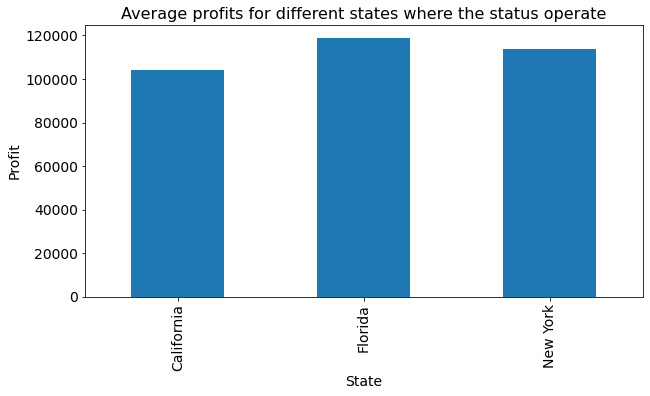

In [8]:
StateWiseDistribution= df.groupby(['State'])['Profit'].mean().plot.bar(figsize=(10,5), fontsize=14)
StateWiseDistribution.set_title('Average profits for different states where the status operate',fontsize=16)
StateWiseDistribution.set_xlabel('State',fontsize=14)
StateWiseDistribution.set_ylabel('Profit',fontsize=14)

In [9]:
#Changing the categorical variables into numerical variables
df['NewYork_State']= np.where(df['State']=='New York', 1,0)
df['California_State']=np.where(df['State']=='California',1,0)
df['Florida_State']=np.where(df['State']=='Florida',1,0)

In [10]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [11]:
df.drop(columns=['State'],  axis=1,inplace=True)

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [16]:
dependent_variable='Profit'
independent_variables= list(set(df.columns.tolist())-{dependent_variable})

In [17]:
independent_variables

['R&D Spend',
 'California_State',
 'Marketing Spend',
 'Florida_State',
 'NewYork_State',
 'Administration']

In [21]:
#Creating data for independent variables
X=df[independent_variables].values

#Creating data for dependent variable
Y=df[dependent_variable].values

In [23]:
#Splitting the dataset into train and test
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y, test_size=.2, random_state=0)

In [25]:
X_Train[:10]

array([[5.5493950e+04, 0.0000000e+00, 2.1463481e+05, 1.0000000e+00,
        0.0000000e+00, 1.0305749e+05],
       [4.6014020e+04, 0.0000000e+00, 2.0551764e+05, 0.0000000e+00,
        1.0000000e+00, 8.5047440e+04],
       [7.5328870e+04, 0.0000000e+00, 1.3405007e+05, 1.0000000e+00,
        0.0000000e+00, 1.4413598e+05],
       [4.6426070e+04, 1.0000000e+00, 2.1079767e+05, 0.0000000e+00,
        0.0000000e+00, 1.5769392e+05],
       [9.1749160e+04, 0.0000000e+00, 2.9491957e+05, 1.0000000e+00,
        0.0000000e+00, 1.1417579e+05],
       [1.3029813e+05, 0.0000000e+00, 3.2387668e+05, 1.0000000e+00,
        0.0000000e+00, 1.4553006e+05],
       [1.1994324e+05, 0.0000000e+00, 2.5651292e+05, 1.0000000e+00,
        0.0000000e+00, 1.5654742e+05],
       [1.0002300e+03, 0.0000000e+00, 1.9039300e+03, 0.0000000e+00,
        1.0000000e+00, 1.2415304e+05],
       [5.4205000e+02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 5.1743150e+04],
       [6.5605480e+04, 0.0000000e+00,

In [26]:
#Transforming the data
Scalar = MinMaxScaler()
X_Train=Scalar.fit_transform(X_Train)
X_Test=Scalar.transform(X_Test)

In [27]:
#Creating a model
Regressor = LinearRegression()
Regressor.fit(X_Train,Y_Train)

LinearRegression()

In [ ]:
#Prediction form the data in the train set and comparing with the actual profit from the train data and predicted profit with the train data
Y_Pred_Train = Regressor.predict(X_Train)
Y_Pred_Train

In [ ]:
Y_Train

In [30]:
mean_squared_error(Y_Pred_Train,Y_Train)

81571001.80077371

In [ ]:
math.sqrt(mean_squared_error(Y_Pred_Train,Y_Train))

In [35]:
#Prediction from the data in the test set and comparing the actual and predicted values
Y_Pred_From_Testdata = Regressor.predict(X_Test)
Y_Pred_From_Testdata
print(math.sqrt(mean_squared_error(Y_Pred_From_Testdata,Y_Test)))
print(Regressor.coef_)
print(Regressor.intercept_)

9137.990152794944
[ 1.27892182e+05  8.66383692e+01  1.72720281e+04 -8.72645791e+02
  7.86007422e+02  3.49927567e+03]
44153.954667848535


In [40]:
print(r2_score(Y_Train,Y_Pred_Train))
print(r2_score(Y_Test,Y_Pred_From_Testdata))


0.9501847627493607
0.9347068473282425
